## Заболевания сердечно-сосудистой системы

Перед нами данные медицинских обследований сердечно-сосудистой системы `cardio_train.csv`. У части пациентов подтвердилось наличие заболевание ССС. В датасете есть данные о параметрах пациентов, возрасте, вредных привычках, а также результаты рутинных обследований (артериальное давление - систолическое `ap_hi` и диастолическое `ap_lo`, холестерин и глбкоза в крови).

**Целью этого исследования данных является поиск факторов, влияющих на развитие сердечно-сосудистых заболеваний.**

### Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set(); # более красивый внешний вид графиков по умолчанию

In [3]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [4]:
#можно выводить основные методы для обзора данных этой функцией
def lookthroughdata(data):
    return data.head(10).T, data.info(), df.describe().T, data.hist(figsize=(12,15));

In [5]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [6]:
# так нагляднее, когда признаков много
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0.0,1.0,2.0,3.0,4.0,8.0,9.0,12.0,13.0,14.0
age,18393.0,20228.0,18857.0,17623.0,17474.0,21914.0,22113.0,22584.0,17668.0,19834.0
gender,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
height,168.0,156.0,165.0,169.0,156.0,151.0,157.0,178.0,158.0,164.0
weight,62.0,85.0,64.0,82.0,56.0,67.0,93.0,95.0,71.0,68.0
ap_hi,110.0,140.0,130.0,150.0,100.0,120.0,130.0,130.0,110.0,110.0
ap_lo,80.0,90.0,70.0,100.0,60.0,80.0,80.0,90.0,70.0,60.0
cholesterol,1.0,3.0,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0
gluc,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


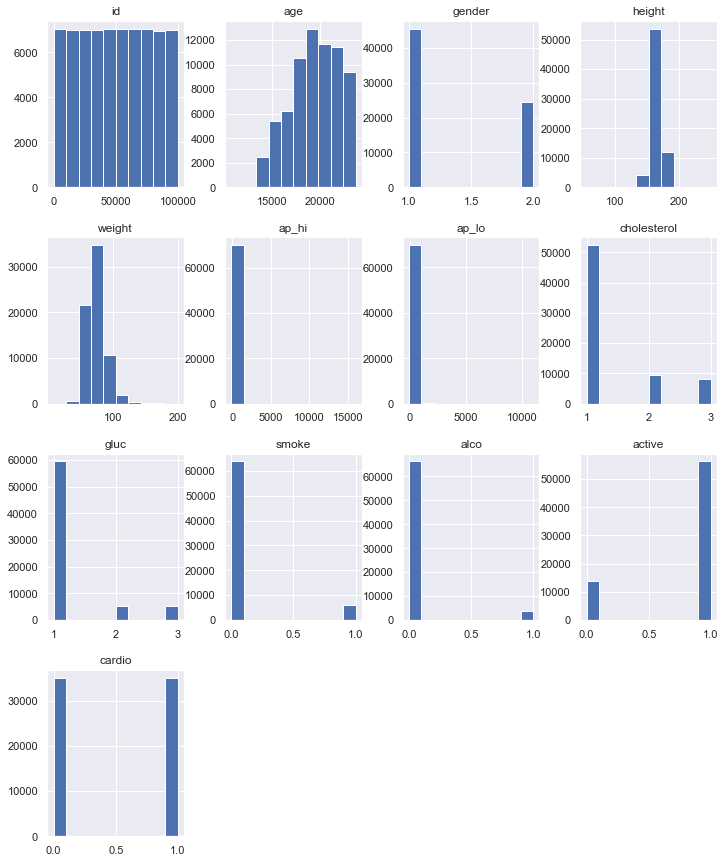

In [9]:
df.hist(figsize=(12,15));

Данные представлены в 13 колонках, 70000 записей о пациентах. 

В данных нет пропусков.

Видны аномальные значения в столбцах  с давлением (отрицательные значения). Скорее всего, минус появился случайно. Для этих колонок есть аномально высокие значения.

Присутствуют аномально большие и маленькие значения роста.

Возраст выглядит странно, т.к. представлен в днях.


Многие данные сложно читаются поэтому преобразуем их в более удобный формат для восприятия.

### Предобработка данных

#### Возраст

Преобразуем возраст из дней в годы.

In [10]:
df['age'] = (df['age']/365).round()
df['age'] = df['age'].astype('int')
df['age']

0        50
1        55
2        52
3        48
4        48
         ..
69995    53
69996    62
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int32

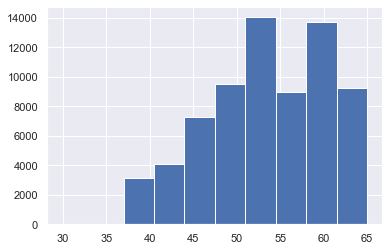

In [11]:
df['age'].hist();

В датасете представлены данные людей страше 35, многие пенсионного возраста.

#### Рост

В столбце роста есть выпадающие значения, рассмотрим их.

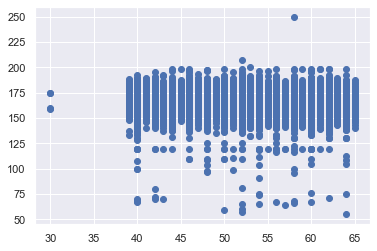

In [12]:
plt.scatter(df['age'], df['height']);

<AxesSubplot:>

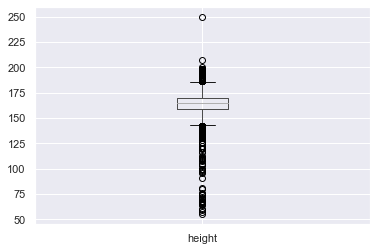

In [13]:
df.boxplot('height')

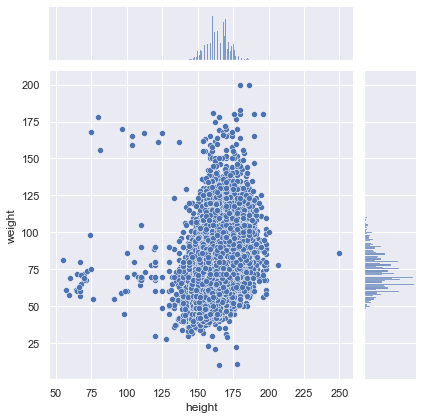

In [14]:
sns.jointplot(x='height', y='weight', data=df);

Есть аномально низкие значения, возьмем порог d 125 см. И аномально высокие - больше 200 см.

In [15]:
df.query('height<125').shape[0]

87

In [16]:
df.query('height>200').shape[0]

2

Удалим аномальные значения и соотвествующие строки,  сделав соотвествующий срез.

In [17]:
df = df.query('125<=height<=200')

Посмотрим долю оставшихся строк - все ок.

In [18]:
old_df = pd.read_csv('cardio_train.csv', sep=';')
df.shape[0]/old_df.shape[0]

0.9987285714285714

#### Вес

<AxesSubplot:>

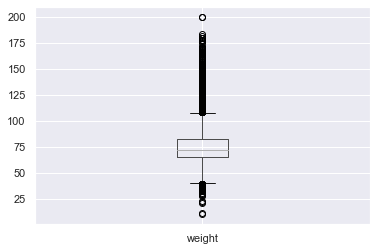

In [19]:
df.boxplot('weight')

In [20]:
df.query('weight<40').shape[0]

51

In [21]:
df.query('weight>150').shape[0]

51

In [22]:
#уберем строки с аномально большим и малым весом
df = df.query('40<=weight<=150')

In [23]:
#остаток строк
old_df = pd.read_csv('cardio_train.csv', sep=';')
df.shape[0]/old_df.shape[0]

0.9972714285714286

#### Артериальное давление

<AxesSubplot:>

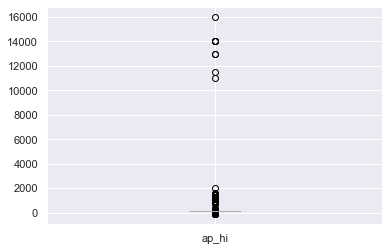

In [24]:
df.boxplot('ap_hi')

Порог для аномально малых значений возьмем в 80 мм рт ст.
Порог для аномально больших значений - 200.

In [25]:
df.query('ap_hi<80').shape[0]

205

In [26]:
df.query('ap_hi>200').shape[0]

99

In [27]:
df = df.query('80<=ap_hi<=200')

<AxesSubplot:>

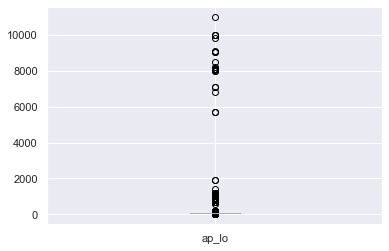

In [28]:
df.boxplot('ap_lo')

In [29]:
df.query('ap_lo<50').shape[0]

62

In [30]:
df.query('ap_lo>500').shape[0]

934

В датасете странным образом много значений давления выше 200, что практически не встречается в практике. В норме диастолическое давление составление 80+-20. Вероятно, в строки со высокими значениями закралась ошибка, и указаны значения в 10 раз выше (случайно добавился лишний ноль). Исправим значения равные и выше 500 и затем удалим значения выше 180.

In [31]:
df['ap_lo'] = df['ap_lo'].where(df['ap_lo']<500,df['ap_lo']/10)

<AxesSubplot:>

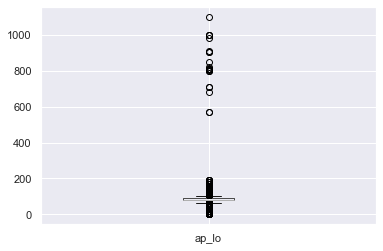

In [32]:
df.boxplot('ap_lo')

In [33]:
df.query('ap_lo>180').shape[0]

29

In [34]:
df = df.query('50<=ap_lo<=180')

In [35]:
df['ap_lo'] = df['ap_lo'].astype('int')

Кроме того, систолическое давление всегда выше диастолического. Посмотрим и удалим строки, где не так.

In [36]:
df.query('ap_lo>=ap_hi').shape[0]

89

In [37]:
df = df.query('ap_lo<ap_hi')

In [38]:
#остаток строк
old_df = pd.read_csv('cardio_train.csv', sep=';')
df.shape[0]/old_df.shape[0]

0.9903571428571428

#### Преобразование типа переменных

Часть переменных хочется преобразовать с непонятных чисел, в говорящие строки

Преобразуем 1 и 2 в w (woman) и m (man) соотвественно. 
1 - women, 2 - men

In [39]:
df.loc[df['gender']==1, 'gender'] = 'w'
df.loc[df['gender']==2, 'gender'] = 'm'
df['gender']

0        m
1        w
2        w
3        m
4        w
        ..
69995    m
69996    w
69997    m
69998    w
69999    w
Name: gender, Length: 69325, dtype: object

Содержание холестерина в крови:
1: normal, 2: above normal, 3: well above normal

In [40]:
df.loc[df['cholesterol']==1, 'cholesterol'] = 'normal'
df.loc[df['cholesterol']==2, 'cholesterol'] = 'above normal'
df.loc[df['cholesterol']==3, 'cholesterol'] = 'well above normal'
df['cholesterol']

0                   normal
1        well above normal
2        well above normal
3                   normal
4                   normal
               ...        
69995               normal
69996         above normal
69997    well above normal
69998               normal
69999         above normal
Name: cholesterol, Length: 69325, dtype: object

Содержание глюкозы в крови. 1: normal, 2: above normal, 3: well above normal

In [41]:
df.loc[df['gluc']==1, 'gluc'] = 'normal'
df.loc[df['gluc']==2, 'gluc'] = 'above normal'
df.loc[df['gluc']==3, 'gluc'] = 'well above normal'
df['gluc']

0              normal
1              normal
2              normal
3              normal
4              normal
             ...     
69995          normal
69996    above normal
69997          normal
69998    above normal
69999          normal
Name: gluc, Length: 69325, dtype: object

In [42]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0,1,2,3,4,8,9,12,13,14
age,50,55,52,48,48,60,61,62,48,54
gender,m,w,w,m,w,w,w,m,w,w
height,168,156,165,169,156,151,157,178,158,164
weight,62.0,85.0,64.0,82.0,56.0,67.0,93.0,95.0,71.0,68.0
ap_hi,110,140,130,150,100,120,130,130,110,110
ap_lo,80,90,70,100,60,80,80,90,70,60
cholesterol,normal,well above normal,well above normal,normal,normal,above normal,well above normal,well above normal,normal,normal
gluc,normal,normal,normal,normal,normal,above normal,normal,well above normal,normal,normal
smoke,0,0,0,0,0,0,0,0,0,0


#### Вывод

В ходе предобработки данных:
- возраст преобразован из дней в годы
- удалены аномалии значений роста, веса, артериального давления. всего удалено около 1 % строк.
- для удосбства преобразованы содержание глюкозы в крови, холестерина, пол пациента из типа int в object, чтобы сразу была понятна характеристика в соотвествущем столбце

### Собственно исследование данных

In [43]:
df['cardio'].value_counts()

0    34719
1    34606
Name: cardio, dtype: int64

In [44]:
df['cardio'].value_counts(normalize=True)

0    0.500815
1    0.499185
Name: cardio, dtype: float64

Доли больных и здоровых пациентов датасета примерно одинаковы, т е классы сбалансированы. это хорошо.

In [45]:
df['gender'].value_counts(normalize=True)

w    0.650631
m    0.349369
Name: gender, dtype: float64

Женщин в исследовании практически в 2 раза больше чем мужчин.

#### Фактор возраста

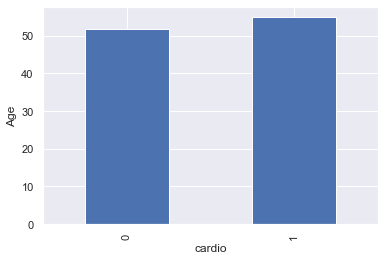

In [46]:
df.groupby('cardio')['age'].mean().plot(kind='bar') 
plt.ylabel('Age') # добавляем подпись на оси Оу
plt.show();

Средний возраст больных чуть выше, чем у здоровых.

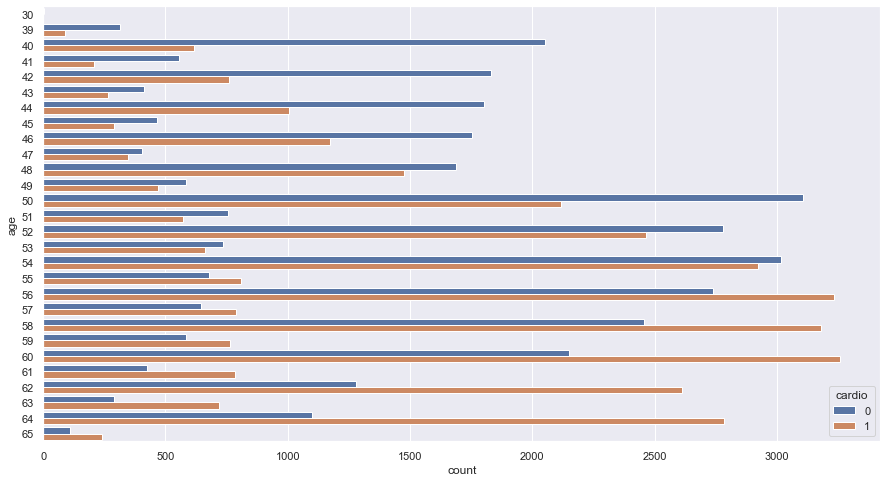

In [47]:
plt.figure(figsize=(15, 8)) 
sns.countplot(y='age', hue='cardio', data=df);

Начиная с 55 лет, количество больных людей больше, чем здоровых того же возраста.

In [48]:
def cardio_factors(factor):
    data_temp = df.pivot_table(values=['cardio'], index=[factor], aggfunc=['count','sum','mean'])
    data_temp.columns = ['Всего пациентов', 'Всего больных', 'Доля больных']
    display(data_temp.style.format("{:.3f}").background_gradient(cmap='RdPu', axis=0))

In [49]:
cardio_factors('age')

,Всего пациентов,Всего больных,Доля больных
age,,,
30,4.000,0.000,0.000
39,405.000,91.000,0.225
40,2669.000,616.000,0.231
41,761.000,206.000,0.271
42,2593.000,761.000,0.293
43,675.000,263.000,0.390
44,2811.000,1007.000,0.358
45,752.000,288.000,0.383
46,2924.000,1171.000,0.400


Есть зависимость. Чем старше пациент, тем вероятнее он страдает ССЗ. К сожалению, очевидный факт, т.к. с возрастом ССС изнашивается и соотвественно появляются заболевания.

#### Фактор пола

In [50]:
cardio_factors('gender')

,Всего пациентов,Всего больных,Доля больных
gender,,,
m,24220.000,12211.000,0.504
w,45105.000,22395.000,0.497


Как в случае женщин, так и в случае мужчин страдают ССЗ половина обследованных пациентов группы по гендеру. Таким образом, пол не влияет на развитие ССЗ.

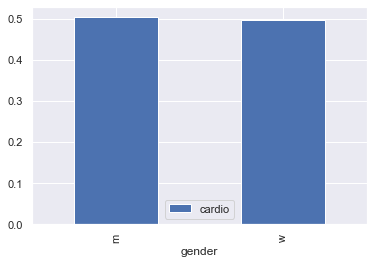

In [51]:
df.pivot_table(values=['cardio'], index=['gender'], aggfunc='mean').plot(kind = 'bar')
plt.show()

#### Курение и употребление алкоголя

In [52]:
cardio_factors('smoke')

,Всего пациентов,Всего больных,Доля больных
smoke,,,
0,63203.000,31704.000,0.502
1,6122.000,2902.000,0.474


In [53]:
cardio_factors('alco')

,Всего пациентов,Всего больных,Доля больных
alco,,,
0,65616.000,32814.000,0.500
1,3709.000,1792.000,0.483


In [54]:
df.pivot_table(values=['cardio'], index=['gender', 'smoke', 'alco'], aggfunc='mean')

cardio
gender smoke alco          
m      0     0     0.511519
             1     0.536996
       1     0     0.486531
             1     0.446035
w      0     0     0.496653
             1     0.507128
       1     0     0.488444
             1     0.424051

Странным образом, наличие вредных привычек не ведет к увеличению вероятности возникновения ССЗ. Ни у женщин, ни у мужчин. 

Возможно, люди, которые отметили отсуствие у себя вредных привычек, злоупотребляли курением и алкоголем ранее ,а на момент исследования бросили. Развитие ССЗ у некурящих людей также может быть связано с пассивынм курением.

In [55]:
df.pivot_table(values=['smoke', 'alco'], index=['gender'], aggfunc='mean')

,alco,smoke
gender,,
m,0.106069,0.219447
w,0.025274,0.017892


Доля пациентов с вредными привычками довольно невелика. Особенно у женщин - 2-3% от всех пациентов. А вот у мужчин 10-22%, это уже весомо.

Из последней таблицы также видно, что у мужчин чаще имеются вредные привычки в виде курения и употребления алкоголя.

In [56]:
df.pivot_table(values=['age'], index=['smoke'], aggfunc='mean')

,age
smoke,
0,53.441371
1,52.307579


#### Фактор индекса массы тела

Добавим колонку `bmi` индекс массы тела - отношение массы тела (кг) к квардрату роста (м)

In [57]:
df['bmi'] = df['weight']/(df['height']/100)**2
df['bmi'].mean()

27.45984844654259

Средний ИМТ выше нормы.

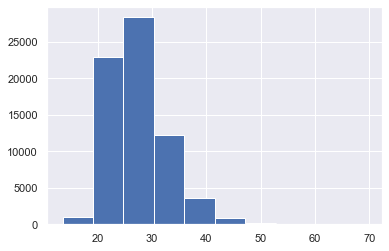

In [58]:
df['bmi'].hist();

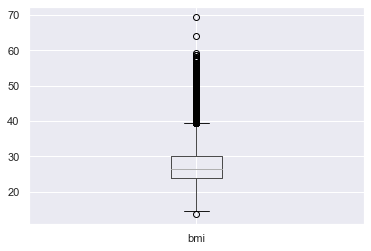

In [59]:
df.boxplot('bmi');

Значения ИМТ распределены нормально. Выбросами можно назвать значения выше 40.

In [60]:
df.query('bmi>40').shape[0]

1718

In [61]:
df= df.query('bmi<=40')

In [62]:
#остаток строк
old_df = pd.read_csv('cardio_train.csv', sep=';')
df.shape[0]/old_df.shape[0]

0.9658142857142857

In [63]:
df.pivot_table(values=['bmi'], index=['gender'], aggfunc='mean')

,bmi
gender,
m,26.513860
w,27.336144


Средний ИМТ у женщин , выше чем у мужчин.

In [64]:
df.pivot_table(values=['bmi'], index=['cardio'], aggfunc='mean')

,bmi
cardio,
0,26.197365
1,27.911103


ИМТ в среднем выше у людей с ССЗ относительно здоровых.

In [65]:
df.pivot_table(values=['bmi'], index=['gender','alco'], aggfunc='mean')

bmi
gender alco           
m      0     26.478161
       1     26.815951
w      0     27.298864
       1     28.810600

Вероятность более высокого ИМТ выше при употреблении алкоголя.

<AxesSubplot:xlabel='cardio', ylabel='bmi'>

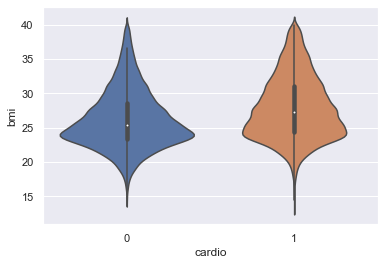

In [66]:
sns.violinplot(x=df['cardio'], y=df['bmi'])

Выполним категоризацию ИМТ:
0 - Anorexic (BMI <= 15)
1 - Underweight (15 < BMI <= 18.5)
2 - Normal weight (18.5 < BMI <= 25)
3 - Overweight (25 < BMI <= 30)
4 - Obesity Class-I (30 < BMI <= 35)
5 - Obesity Class-II (35 < BMI <= 40)

In [67]:
#категоризируем ИМТ
def categ_bmi(bmi):
    if bmi<=18.5:
        return 'underweight'
    elif 18.5<bmi<=25:
        return 'normal'
    elif bmi>25:
        return 'overweight'

In [68]:
df['bmi_class'] = df['bmi'].apply(categ_bmi)

In [69]:
cardio_factors('bmi_class')

,Всего пациентов,Всего больных,Доля больных
bmi_class,,,
normal,25614.000,10276.000,0.401
overweight,41396.000,22966.000,0.555
underweight,597.000,160.000,0.268


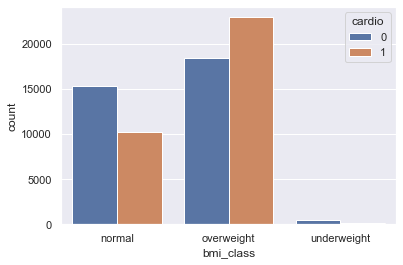

In [70]:
sns.countplot(x='bmi_class', hue='cardio', data=df);

Таким образом, люди страдающие лишним весом (с более высоким ИМТ) более склонны к развитию ССЗ.

#### Уровень холестерина

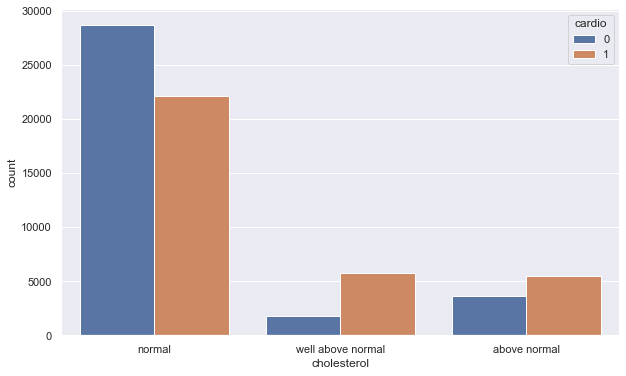

In [71]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x='cholesterol', hue='cardio', data=df);

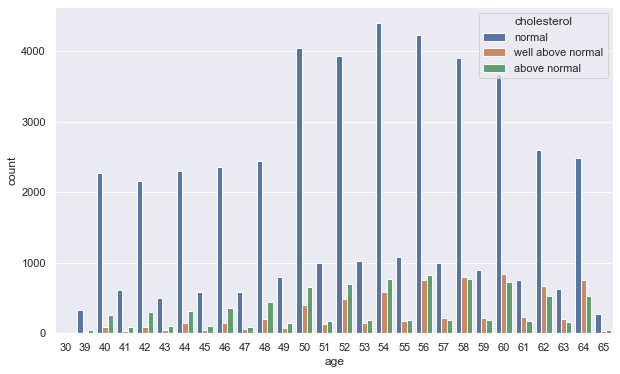

In [72]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x='age', hue='cholesterol', data=df);

In [73]:
cardio_factors('cholesterol')

,Всего пациентов,Всего больных,Доля больных
cholesterol,,,
above normal,9118.000,5442.000,0.597
normal,50889.000,22165.000,0.436
well above normal,7600.000,5795.000,0.762


Более высокий (чем нормальный) уровень холестерина в крови увеличиает вероятность возниконовения ССЗ.

#### Глюкоза в крови

In [74]:
cardio_factors('gluc')

,Всего пациентов,Всего больных,Доля больных
gluc,,,
above normal,4883.000,2857.000,0.585
normal,57687.000,27436.000,0.476
well above normal,5037.000,3109.000,0.617


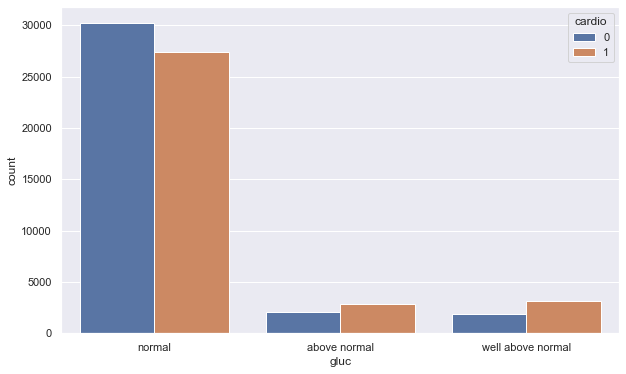

In [75]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x = 'gluc', hue= 'cardio', data = df);

Повышение уровня глюкозы в крови также является фактором развития ССЗ.

#### Физическая активность

In [76]:
cardio_factors('active')

,Всего пациентов,Всего больных,Доля больных
active,,,
0,13221.000,7002.000,0.530
1,54386.000,26400.000,0.485


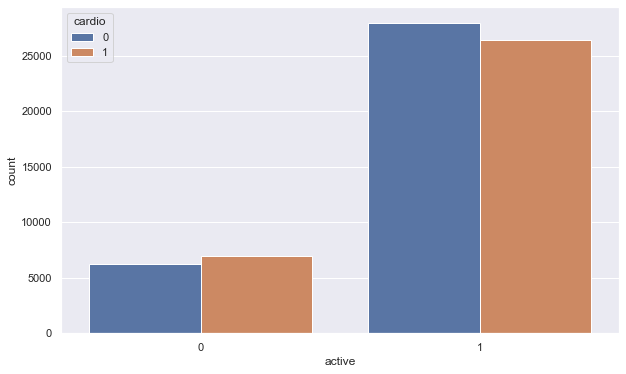

In [77]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x = 'active', hue= 'cardio', data = df);

In [78]:
df.pivot_table(values=['active'], index=['age'], aggfunc='mean')

,active
age,
30,1.000000
39,0.788804
40,0.801445
41,0.780619
42,0.806515
43,0.803030
44,0.821675
45,0.858491
46,0.814815


У физически не активных людей выше шансы развития ССЗ. Доля активных людей в разном возрасте сохраняется на уровне 77-80%. По-видимому, это связано с многолетней полезной привычкой заниматься спортом, которая формируется еще в молодости.

#### Выводы

1. Начиная с 55 лет, количество больных людей больше, чем здоровых того же возраста. Чем старше пациент, тем вероятнее он страдает ССЗ. К сожалению, очевидный факт, т.к. с возрастом ССС изнашивается и соотвественно появляются заболевания.
2. Как в случае женщин, так и в случае мужчин страдают ССЗ половина обследованных пациентов группы по гендеру. Таким образом, пол не влияет на развитие ССЗ.
3. Странным образом, наличие вредных привычек не ведет к увеличению вероятности возникновения ССЗ. Ни у женщин, ни у мужчин. Возможно, люди, которые отметили отсуствие у себя вредных привычек, злоупотребляли курением и алкоголем ранее ,а на момент исследования бросили. Развитие ССЗ у некурящих людей также может быть связано с пассивынм курением.
4. Люди страдающие лишним весом (с более высоким ИМТ) более склонны к развитию ССЗ.
5. Более высокий (чем нормальный) уровень холестерина в крови увеличиает вероятность возниконовения ССЗ.
6. Повышение уровня глюкозы в крови также является фактором развития ССЗ.
7. У физически не активных людей выше шансы развития ССЗ. Доля активных людей в разном возрасте сохраняется на уровне 77-80%. По-видимому, это связано с многолетней полезной привычкой заниматься спортом, которая формируется еще в молодости.

### Общий вывод

Была проведена работа с данными о пациентах, проходивших обследования ССС и выялены факторы, влияющие на развития ССЗ.
Данные представлены в 13 колонках, 70000 записей о пациентах. В данных нет пропусков.Были найдены аномальные значения в столбцах с давлением `ap_hi`, `ap_lo`, ростом `height` и весом `weight`. Возраст `age` представлен в днях, что не удобно для анализа. Многие характеристики (пол, уровень холестерина и глюкозы в крови) обозначены номерами, что также неудобно и ненаглядно.


В ходе предобработки данных:
- возраст преобразован из дней в годы
- удалены аномалии значений роста, веса, артериального давления. всего удалено около 3.5 % строк.
- для удобства преобразованы содержание глюкозы в крови, холестерина, пол пациента из типа int в object, чтобы сразу была понятна характеристика в соотвествущем столбце
- добавлен столбец `bmi` обозначающий индекс массы тела пациента. ИМТ равен отношению массы тела в кг к квадрату роста в м.

В ходе исследования взаимосвязи параметров пациентов с развитием сердечно-сосудистых заболеваний (ССЗ) было показано следующее:
- Чем старше пациент, тем вероятнее он страдает ССЗ. К сожалению, очевидный факт, т.к. с возрастом ССС изнашивается и соотвественно появляются заболевания.
- Пол не влияет на развитие ССЗ.
- Странным образом, наличие вредных привычек не ведет к увеличению вероятности возникновения ССЗ. Возможно, люди, которые отметили отсуствие у себя вредных привычек, злоупотребляли курением и алкоголем ранее ,а на момент исследования бросили. Развитие ССЗ у некурящих людей также может быть связано с пассивным курением.
- Люди страдающие лишним весом более склонны к развитию ССЗ.
- Более высокий (чем нормальный) уровень холестерина и глюкозы в крови увеличивают вероятность возниконовения ССЗ.
- У физически не активных людей выше шансы развития ССЗ.

Таким образом, основными факторами развития ССЗ являются пожилой возраст, лишний вес, неправильное питание и отсутствие физической активности.